# Task02 回归

## 1 回归定义和应用场景

 - 定义：  
   **目标**：找到一个函数`function`  
   **输入**：特征$x$  
   **输出**：一个数值$scalar$  

- 应用场景举例：股市预测、自动驾驶、商品推荐、Pokemon精灵攻击力预测

## 2 模型构建步骤

&emsp;&emsp;通过Pokemon精灵攻击力预测示例，介绍回归模型构建的主要步骤：

1. 模型假设，选择模型框架（线性模型）

- 一元线性模型（单个特征）：CP值的单值特征

- 多元线性模型（多个特征）：进化前的CP值、物种（Bulbasaur）、血量（HP）、重量（Weight）、高度（Height）等

2. 模型评估，如何判断众多模型的好坏（损失函数）

- 收集和查看训练数据：使用可视化的方式，将10组原始数据（进化前的CP值/进化后的CP值）进行展示

- 判断众多模型的好坏：使用损失函数衡量模型的好坏，统计10组原始数据的平均误差，该值越小，模型越好
$$
L(w,b)= \sum_{n=1}^{10}\left ( \hat{y}^n - (b + w·x_{cp}) \right )^2
$$

3. 模型优化，如何筛选最优的模型（梯度下降）

- 学习率：移动的步长
- 选取最优值的步骤  
（1）随机选取一个 $w^0$  
（2）计算微分，也就是当前的斜率，根据斜率来判定移动的方向：大于0向右移动（增加$w$），小于0向左移动（减少$w$）  
（3）根据学习率移动  
（4）重复步骤2和步骤3，直到找到最低点 

## 3 构建更强大复杂的模型：1元N次线性模型

- 高次线性模型构建：通过逐步构建高次模型，比较平均误差

- 优化步骤  
（1）通过对Pokemons种类（Pidgey、Eevee、Caterpie、Weedie）判断，将4个线性模型合并到一个线性模型中；  
（2）通过对特征的图形化分析，使用更多的特征（血量（HP）、重量（Weight）、高度（Height））加入到模型中；  
（3）使用正则化，降低特征权值过高的问题。

## 4 代码实战

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

# matplotlib没有中文字体，动态解决
# 显示中文
plt.rcParams['font.sans-serif'] = ['Simhei']  
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False  

In [4]:
# 使用样例数据
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)

In [5]:
# 绘制w,b的坐标轴
x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

In [6]:
# loss
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  # meshgrid吐出结果：y为行，x为列
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)

In [27]:
# linear regression
b = -120
w = -4
lr = 1
iteration = 1000000

b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

import time
start = time.time()

# 梯度下降
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad= b_grad - 2.0 * (y_data[n] - n - w*x_data[n]) * 1.0
        w_grad= w_grad - 2.0 * (y_data[n] - n - w*x_data[n]) * x_data[n]
    
    lr_b = lr_b+b_grad**2
    lr_w = lr_w+w_grad**2
    
    # 参数更新
    b -= lr / np.sqrt(lr_b) * b_grad
    w -= lr / np.sqrt(lr_w) * w_grad

    b_history.append(b)
    w_history.append(w)

# 计算梯度下降时间    
end = time.time()
print("大约需要时间：",end-start)

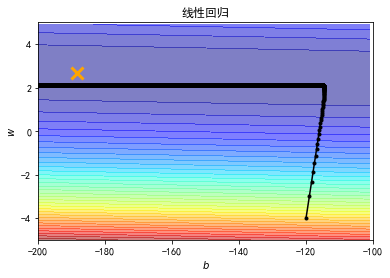

In [28]:
# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")
plt.show()

## 5 总结

&emsp;&emsp;本次任务，主要介绍回归线性模型，使用Pokemon精灵攻击力预测示例，讲解模型构建步骤，包括模型假设、模型评估和模型优化，从单一特征的模型构建，到多个特征，逐步优化模型，最后通过示例数据，介绍线性回归的参数梯度下降，通过可视化图形，观察梯度下降过程。